# Assignment 1
### CHEM ENG/ SEP 786
### Mohammad Kashif Siddiqui - 0755452


### Headers

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import pandas
from IPython.display import Image

### Checking paths

In [2]:
print('test1')
dir_path = os.getcwd()
print(dir_path)

test1
C:\Users\User\AppData\Roaming\Python\Python35\Scripts\Allwork\SEP_786


# Question 1
#### Using the Excel file dataA.xlsx, which contains a 500x3 data matrix (500 data points with 3 attributes), calculate both the mean and the covariance matrix.


### Uploading & Checking Data

In [3]:
dataA = np.loadtxt('dataA.csv', delimiter=',') 
print("dataA:")
print(dataA)
type(dataA)

dataA:
[[ 1.55689089  4.01059603  1.29323385]
 [-1.39048821  3.24872268 -1.01189759]
 [ 0.92749172  2.11432065 -2.21430133]
 ...
 [ 3.09422969  4.06386355  1.72786312]
 [-0.78509245 -1.46375948  2.68672626]
 [ 2.14907545  2.35843938  2.11973336]]


numpy.ndarray

### Mean Matrix

##### Process - Finding the means of the columns (axis = 0)

In [4]:
mean = np.mean(dataA,axis=0)
print('mean of dataA:')
print(mean)

mean of dataA:
[0.34750193 1.02563712 0.80122132]


### Covariance Matrix

##### Process - As discussed in lecture, applying the covariance forumla: cov = (X^T*X)/n-1, Also try out np.cov(data ^T) to confirm.
##### Result - np.cov function has far more significant digits by default, and slightly different results --- find out why?! 
##### Explaination - the formula np.dot(np.transpose(dmm),dmm)/len(dmm)-1 was missing brackets around (len(dmm)-1) giving a slight offset

In [9]:
dmm = dataA- mean #calculating data minus mean
print('dmm:')
print(dmm)

cov = np.dot(np.transpose(dmm),dmm)/(len(dmm)-1)
print('cov matrix:')
print(cov)

cov2 = np.cov(dmm.T)
print('cov2 matrix:')
print(cov2)
print('cov2 shape:', cov2.shape)

dmm:
[[ 1.20938897  2.9849589   0.49201253]
 [-1.73799014  2.22308556 -1.81311891]
 [ 0.5799898   1.08868353 -3.01552265]
 ...
 [ 2.74672777  3.03822643  0.92664179]
 [-1.13259437 -2.48939661  1.88550494]
 [ 1.80157353  1.33280226  1.31851204]]
cov matrix:
[[4.0704887  0.1502016  0.26208365]
 [0.1502016  2.56307135 0.01468606]
 [0.26208365 0.01468606 3.18321243]]
cov2 matrix:
[[4.0704887  0.1502016  0.26208365]
 [0.1502016  2.56307135 0.01468606]
 [0.26208365 0.01468606 3.18321243]]
cov2 shape: (3, 3)


# Question 2
#### Using the Excel file dataB.xlsx, which contains a 500x10 data matrix (500 data points with 10 attributes), calculate both the mean and the covariance matrix.

### Uploading & Checking Data

In [10]:
dataB = np.loadtxt('dataB.csv', delimiter=',') 
print("dataB:")
print(dataB)
print(dataB.shape)
type(dataB)

dataB:
[[  8.65459847   4.5620827    1.38692383 ...   4.97059994  -5.21064875
    4.00363613]
 [  8.73913433   7.14120061   7.8046532  ...  10.05300533  -4.23675514
    0.65769703]
 [ 11.83876324   8.93293461   8.75195321 ...   7.62535922 -10.91127599
   -0.41110291]
 ...
 [ 13.89179674   4.14493518   7.03398343 ...   5.50311762  -0.63970448
    0.72106267]
 [ 10.84950119   2.59352959   3.84345036 ...   3.09446443  -1.83492417
    1.56929856]
 [  8.42435559   9.80180673  10.04606526 ...   6.15884425  -1.12177575
    6.53539108]]
(500, 10)


numpy.ndarray

### Mean Matrix

##### Process - Finding the means of the columns (axis = 0)

In [11]:
meanB = np.mean(dataB,axis=0)
print('mean of dataB:')
print(meanB)
meanB.shape

mean of dataB:
[9.57062029 6.15014874 8.08016477 9.55989208 8.8040749  2.19491256
 0.20634971 4.54942571 0.06659806 4.65575632]


(10,)

### Covariance Matrix

##### Process - As discussed in lecture, applying the covariance forumla: cov = (X^T*X)/n-1 , Also try out np.cov(data ^T) to confirm
##### Result - np.cov function has far more significant digits by default, and slightly different results --- find out why?!
##### Explanation - The numbers look different and according to the np.array_equal but according to np.allclose(), the two matrices are similar enough. Same error as before, missing brackets. - Issue considered resolved.

In [12]:
dmmB = dataB - meanB #calculating data minus mean
print('dmmB:')
print(dmmB)

covB = np.dot(np.transpose(dmmB),dmmB)/(len(dmmB)-1)
print('covB matrix:')
print(covB)
print('covB shape:', covB.shape)

#confirming the results with the np.cov function 
covB_2 = np.cov(dmmB.T)
print('covB_2 matrix:')
print(covB_2)
print('covB_2 shape:', covB_2.shape)

#Testing out if data without the mean subtracted makes a difference 
covB_2b = np.cov(dataB.T) 
print('covB_2b matrix:')
print(covB_2b)
print('covB_2b shape:', covB_2b.shape)

#comparing the two matricies to see if they are actually equal?
covB.all() == covB_2.all()

check1= np.array_equal(covB,covB_2)
print('comparing if the two covariance matricies are equal:', check1)
check2= np.allclose(covB,covB_2)
print('comparing if the two covariance matricies are close enough:', check2)


dmmB:
[[ -0.91602182  -1.58806604  -6.69324094 ...   0.42117423  -5.27724681
   -0.65212019]
 [ -0.83148596   0.99105187  -0.27551157 ...   5.50357962  -4.3033532
   -3.99805929]
 [  2.26814295   2.78278587   0.67178844 ...   3.07593351 -10.97787405
   -5.06685923]
 ...
 [  4.32117645  -2.00521356  -1.04618134 ...   0.95369191  -0.70630255
   -3.93469366]
 [  1.2788809   -3.55661915  -4.23671441 ...  -1.45496128  -1.90152223
   -3.08645776]
 [ -1.1462647    3.65165799   1.96590049 ...   1.60941854  -1.18837381
    1.87963476]]
covB matrix:
[[ 9.57410499e+00  1.57425516e-01  6.91005994e-01 -4.31571355e-02
  -1.55295413e-01  1.12934141e+00  2.64463627e-02 -4.86546020e-01
   9.56363711e-01  5.33278215e-01]
 [ 1.57425516e-01  9.51640579e+00  4.77570667e-01  4.13335012e-01
   5.57375795e-03  5.31944564e-01  1.11001534e-01  1.70331332e-01
   8.41055236e-01  1.33915044e+00]
 [ 6.91005994e-01  4.77570667e-01  8.65741988e+00 -3.11621447e-01
   1.65566175e-01  1.92252560e-01  1.85855053e-01  4.1

# Question 3
#### The data generated is random and normally distributed with a mean for dataA, dataB and covariance for dataA and dataB given in meanA.xlsx, meanB.xlsx, covarianceA.xlsx and covarianceB.xlsx respectively. Briefly explain why your answers are different from the parameters used to generate the data

### Uploading & Checking Data

In [13]:
#Data from the meanA.csv
mean_A = np.loadtxt('meanA.csv', delimiter=',') 
print("mean_A:")
print(mean_A)

#Calculated mean from DataA
mean = np.mean(dataA,axis=0)
print('mean of dataA:')
print(mean)

#comparison to see if they are the same
check= np.array_equal(mean_A,mean)
print('comparing mean_A and mean:', check)


#Data from the meanB.csv
mean_B = np.loadtxt('meanB.csv', delimiter=',') 
print("mean_B:")
print(mean_B)

#Calculated mean from DataB
meanB = np.mean(dataB,axis=0)
print('mean of dataB:')
print(meanB)

#comparison to see if they are the same
check= np.array_equal(mean_B,meanB)
print('comparing mean_A and mean:', check)


mean_A:
[0.49905573 1.01308501 0.71869776]
mean of dataA:
[0.34750193 1.02563712 0.80122132]
comparing mean_A and mean: False
mean_B:
[6.07214246 3.49288812 5.26214561 7.96915184 2.73675928 2.92683597
 3.48151886 8.75972869 0.9331915  2.06680407]
mean of dataB:
[9.57062029 6.15014874 8.08016477 9.55989208 8.8040749  2.19491256
 0.20634971 4.54942571 0.06659806 4.65575632]
comparing mean_A and mean: False


### Discussion

##### If dataA and dataB were randomly generated from the mean and covariance matricies of meanA, covarianceA and meanB, covarianceB respectively. Then dataA and dataB represent a subset of the original population. As such the mean and covariance measured for dataA and dataB are approximations of the original underlying population from which the dataA and dataB samples were gathered. 

##### With each time a random data set is generated from meanA, covarianceA (as well as meanB, covarianceB) the subset data will be only an approximation of the original population. Therefore the subset is likely to approximate the original data and the new mean and covariance is likely to fall within a few standard deviations of the original mean and covariance (given that the distribution of the original population is uniform). See image below for visual explanation.

##### credit: https://psychology.illinoisstate.edu/jccutti/psych340/fall02/oldlecturefiles/prob.html

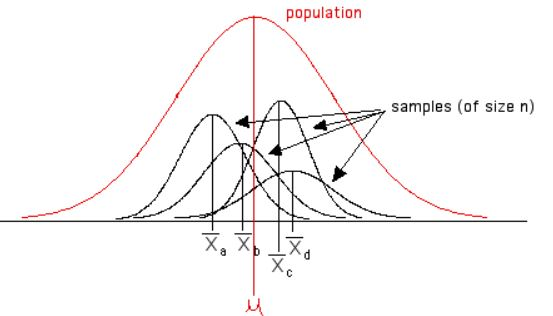

In [14]:
Image("Capture.JPG")

# Question 4
#### From the Excel file document multinormal.xlsx, I have provided 10 examples of samples drawn from a two-dimensional normal distribution (all in one file). In the data, there are 20 columns of 1000 samples. Example 1 is columns 1 and 2, example 2 is columns 3 and 4, etc. For each of the examples, the mean is [0 0]T but the covariance matrix changes.


#### Upload and Check data

In [3]:
MN = np.loadtxt('multNormal.csv', delimiter=',') 
print("MN:")
print(MN)
print(MN.shape)
type(MN)
    

MN:
[[ 5.58356672 -0.44166725 -0.66330018 ...  4.41639307 -2.38075895
   4.31013081]
 [ 6.12972151  2.37490271 -2.58394957 ...  3.68864784  1.24602512
  -1.84089907]
 [ 5.79322627  1.13384463 -1.93949355 ...  1.26877517 -1.4286858
  -1.70033089]
 ...
 [ 1.97378012  0.30006118  1.69632    ... -3.35755906  0.61089252
   3.80150036]
 [-4.96469899  2.26678162 -1.90258141 ... -1.93099511 -0.48067559
  -3.13515325]
 [ 0.05612581  1.13749818  1.85988446 ... -3.08872527 -0.89328109
   2.06782425]]
(1000, 20)


numpy.ndarray

#### A. Plot the 2D points as a scatter plot for each example.

Example  1


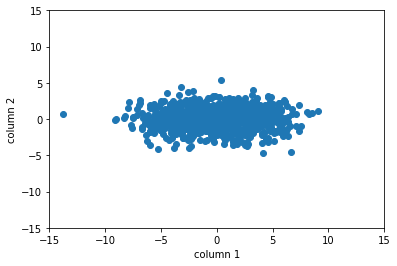

Example  2


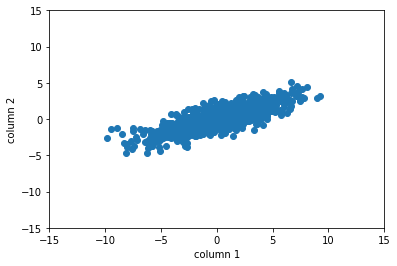

Example  3


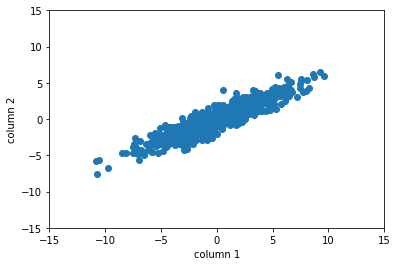

Example  4


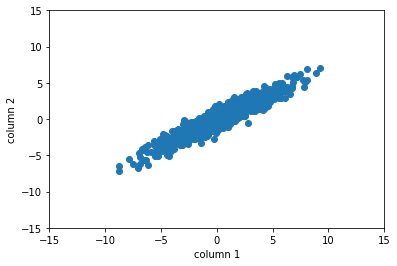

Example  5


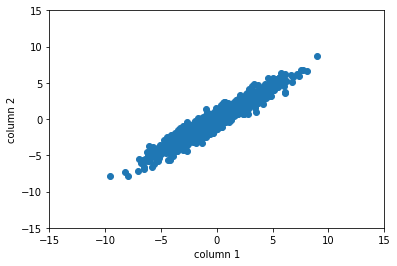

Example  6


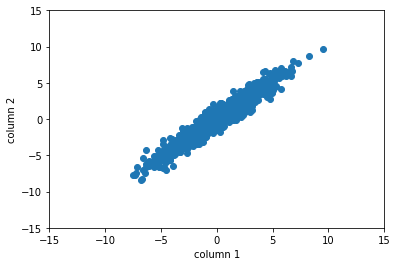

Example  7


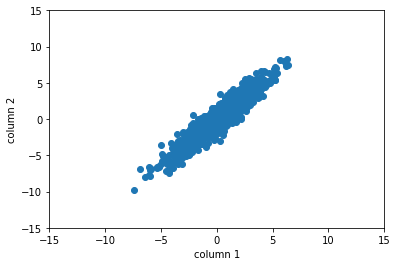

Example  8


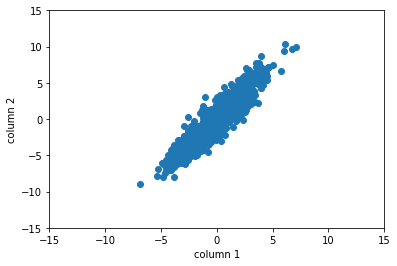

Example  9


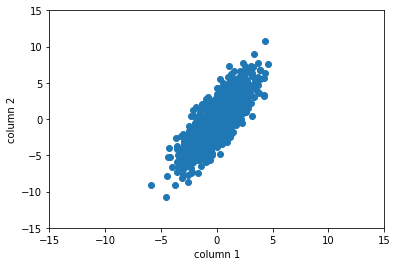

Example  10


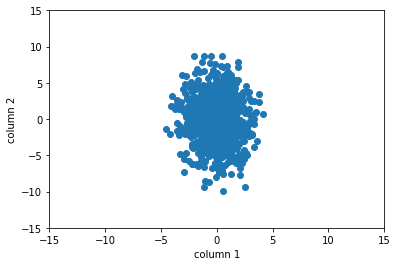

In [9]:
np.random.seed(1234)

i=0
j=1
for i in range(0,20,2):
    print ('Example ', j)
    j += 1
    # this temp array was made to visualize correct elements are being plotted.
    tmp = np.array(MN[:,i:i+2]) #change the rows to 0:5 to better visualize scatterplot
    #print(tmp)
    plt.figure()
    plt.scatter(tmp[:,0], tmp[:,1])
    plt.xlabel('column 1')
    plt.ylabel('column 2')
    plt.xlim(-15,15)
    plt.ylim(-15,15)
    plt.show()
  

#### B. Calculate 10 separate covariance matrices. 

In [5]:
i1=0
j1=1
for i1 in range(0,20,2):
    print ('Example ', j1)
    j1 += 1
    tmp = np.array(MN[:,i1:i1+2])
    #print(tmp)
    mean = np.mean(tmp, axis=0)
    #print('mean: ')
    #print(mean)
    tmp_m_m = tmp - mean
    #print('tmp_m_m:')
    #print(tmp_m_m)
    cov = np.cov(tmp_m_m.T)
    print('covariance:')
    print(cov)

Example  1
covariance:
[[10.34020531 -0.01203439]
 [-0.01203439  2.06085007]]
Example  2
covariance:
[[9.73385592 3.90880004]
 [3.90880004 2.48255605]]
Example  3
covariance:
[[9.81331096 5.9219742 ]
 [5.9219742  4.24147055]]
Example  4
covariance:
[[8.71864832 6.33745747]
 [6.33745747 5.11128219]]
Example  5
covariance:
[[8.08741481 7.13202774]
 [7.13202774 6.80509819]]
Example  6
covariance:
[[7.12792232 7.45150027]
 [7.45150027 8.41154389]]
Example  7
covariance:
[[5.11175555 6.26160543]
 [6.26160543 8.60036264]]
Example  8
covariance:
[[3.81863159 5.42111292]
 [5.42111292 9.12946713]]
Example  9
covariance:
[[2.6227809  4.00206938]
 [4.00206938 9.34683606]]
Example  10
covariance:
[[ 1.9864565  -0.09367179]
 [-0.09367179  9.54814947]]


#### C. Plot the covariance value (the off-diagonal of the covariance matrix) for each example. 

[[-0.01203439 -0.01203439]
 [ 3.90880004  3.90880004]
 [ 5.9219742   5.9219742 ]
 [ 6.33745747  6.33745747]
 [ 7.13202774  7.13202774]
 [ 7.45150027  7.45150027]
 [ 6.26160543  6.26160543]
 [ 5.42111292  5.42111292]
 [ 4.00206938  4.00206938]
 [-0.09367179 -0.09367179]]


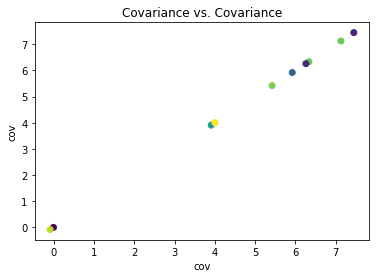

In [6]:
i1=0
#j1=1
k=0
#t=(10,2)
tmp_cov = np.empty([10,2])
#print (tmp_co.shape)
#print(tmp_cov)
for i1 in range(0,20,2):
    #print ('Example ', j1)
    #j1 += 1
    tmp = np.array(MN[:,i1:i1+2])
    #print(tmp)
    mean = np.mean(tmp, axis=0)
    #print('mean: ')
    #print(mean)
    tmp_m_m = tmp - mean
    #print('tmp_m_m:')
    #print(tmp_m_m)
    cov = np.cov(tmp_m_m.T)
    #print('covariance:')
    #print(cov)
    tmp_cov[k,0] = cov[0,1]
    tmp_cov[k,1] = cov[0,1]
    #print(tmp_cov)
    k+=1

    
print(tmp_cov)
colour = np.random.rand(10)
plt.figure()
plt.scatter(tmp_cov[:,0], tmp_cov[:,1], c=colour)
plt.xlabel('cov')
plt.ylabel('cov')
plt.title ('Covariance vs. Covariance')
plt.show()

#### D. Similarly, plot the variance of the first column and the variance of the second column for each example.

[[10.34020531  2.06085007]
 [ 9.73385592  2.48255605]
 [ 9.81331096  4.24147055]
 [ 8.71864832  5.11128219]
 [ 8.08741481  6.80509819]
 [ 7.12792232  8.41154389]
 [ 5.11175555  8.60036264]
 [ 3.81863159  9.12946713]
 [ 2.6227809   9.34683606]
 [ 1.9864565   9.54814947]]


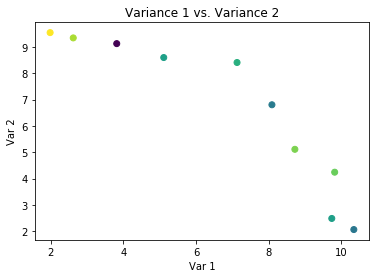

In [7]:
i1=0
#j1=1
k=0
#t=(10,2)
tmp_var = np.empty([10,2])
#print (tmp_co.shape)
#print(tmp_cov)
for i1 in range(0,20,2):
    #print ('Example ', j1)
    #j1 += 1
    tmp = np.array(MN[:,i1:i1+2])
    #print(tmp)
    mean = np.mean(tmp, axis=0)
    #print('mean: ')
    #print(mean)
    tmp_m_m = tmp - mean
    #print('tmp_m_m:')
    #print(tmp_m_m)
    cov = np.cov(tmp_m_m.T)
    #print('covariance:')
    #print(cov)
    tmp_var[k,0] = cov[0,0]
    tmp_var[k,1] = cov[1,1]
    #print(tmp_cov)
    k+=1

print(tmp_var) # this is actually the variance matrix in this case
colour = np.random.rand(10)
plt.figure()
plt.scatter(tmp_var[:,0], tmp_var[:,1], c=colour)
plt.xlabel('Var 1')
plt.ylabel('Var 2')
plt.title ('Variance 1 vs. Variance 2')
plt.show()

#### E. From the 2D scatter plots, what has changed from example to example? Think geometrically!

##### Answer

##### For the variance 1 vs variance 2 plot, its easy to visualize through the graph and the matrix that as Var1 increases Var2 decreases. Variance is also the measure of how much the values are spread around the mean. As seen in the graphs in question 4 part A, its very obvious that there is an approximate 90 degree counter-clockwise rotation in the variance of points from example 1 to 10. This can also be observed in the matrix printed in part D, as the variance in the column 1 continues to decrease and simultaneously increase in column 2 of each example. 

##### Covariance is a visualization of relationship and its directionality between the two columns. That's why is the same in either direction covariance(C1,C2) == covariance(C2,C1). A high positive covariance means that as X increases, Y increases and there is a strong positive relationship and predictability between the two variable. In example 1 and 10, the covariances are very low numbers, and negative, it suggests thate there is a weak and inverse relationship between the X and Y variables of the examples 1 and 10, which can be confirmed from graphs in part A.

#### F. How might I have generated the covariance matrices that were used? Consider three things:

    1. What matrix transformation did I apply to change the covariance matrix for each example?
    2. What properties must a covariance have? (This one is trickier – one property is the matrix must be symmetrical but there is one more important property…)
    3. How might one go about creating a covariance matrix that accomplishes the transformation mentioned in point 1 and has the properties mentioned in point 2?

##### Answer 1.

##### An ~9 degree counter-clockwise rotation in the correlation of the points from one example to the next would allow generating the observed covariance matrices.

##### Answer 2.

##### The diagonal entries on the covariance matrix represent the variance of the values used to generate the covariance matrix. I'm not sure which property you were asking for. Also, it must always have the lowest possible rank. The covariance matrix will depend on the maximum linearly independent row or column vectors in the matrix whichever one is the lowest dimension. 

##### Answer 3.

##### The off-diagonal values need to always be the same. The covariance values can start at an arbitrarily small value and increase to about example 5 and then start to decrease again (as seen in the tmp_cov output below). The two values of the diagonal move in opposite directions (as seen in the tmp_var output below).

In [14]:
print('tmp_cov')
print(tmp_cov)
print('tmp_var')
print(tmp_var)

tmp_cov
[[-0.01203439 -0.01203439]
 [ 3.90880004  3.90880004]
 [ 5.9219742   5.9219742 ]
 [ 6.33745747  6.33745747]
 [ 7.13202774  7.13202774]
 [ 7.45150027  7.45150027]
 [ 6.26160543  6.26160543]
 [ 5.42111292  5.42111292]
 [ 4.00206938  4.00206938]
 [-0.09367179 -0.09367179]]
tmp_var
[[10.34020531  2.06085007]
 [ 9.73385592  2.48255605]
 [ 9.81331096  4.24147055]
 [ 8.71864832  5.11128219]
 [ 8.08741481  6.80509819]
 [ 7.12792232  8.41154389]
 [ 5.11175555  8.60036264]
 [ 3.81863159  9.12946713]
 [ 2.6227809   9.34683606]
 [ 1.9864565   9.54814947]]
